# CS 109A/AC 209A/STAT 121A Data Science: Final Project
**Harvard University**<br>
**Fall 2016**<br>
**Instructors:** W. Pan, P. Protopapas, K. Rader<br>
**Members: ** Shawn Pan, Xinyuan (Amy) Wang, Ming-long Wu

## Remark - 022_visualize_calendar ##

- Explore data from calendar_grid
- Found that price varies with time
- Average price in 365 days can be used as a predictor of price
- Low to mid range prices (< 600) tend to post 0~365 days in a year
- High price range (> 3000) tends to post more than 200 days in a year. Very few samples here though.
- **For weekly price trend, price surges on Friday and Saturday.**
- **For monthly price trend, price surges from March to September.**
- **For monthly price trend, price is lowest in January.**


In [108]:
import time
import pandas as pd
import numpy as np
import scipy as sp
from scipy.signal import savgol_filter
from scipy.stats import mode
import goslate
from langdetect import detect
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib import colors
import matplotlib.dates as mdates
from datetime import datetime
from collections import Counter
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
# read data
calendar = pd.read_csv('../../Data/calendar_grid.csv', delimiter = ',')

# check data
calendar.head(n=10)

,listing_id,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,...,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31
0,3604481,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,...,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0
1,2949128,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,4325397,100.0,100.0,100.0,100.0,100.0,70.0,70.0,70.0,80.0,...,70.0,70.0,70.0,80.0,80.0,70.0,70.0,70.0,70.0,70.0
3,4325398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,275.0,275.0,275.0,275.0,275.0,275.0,275.0,275.0,275.0,275.0
4,3426149,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,NaN,...,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0
5,65562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0
6,2730672,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0
7,4587554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0
8,819206,NaN,NaN,NaN,70.0,70.0,70.0,70.0,70.0,70.0,...,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
9,4849703,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# check calendar size
print calendar.shape

(27392, 366)


In [4]:
calendar_np = calendar.values
calendar_np = np.delete(calendar_np, 0, axis=1)
# Check rows with complete 366 days of price data
check_nan = np.isnan(calendar_np)
row_nan_cnt = np.sum(check_nan, axis=1)
if_complete = row_nan_cnt==0

print 'Number of listing_id with complete 365 days of price: ' + str(np.sum(if_complete))

Number of listing_id with complete 365 days of price: 5764


In [5]:
col_idx = calendar.columns.values
col_idx = col_idx[1:]
datetime_all = []
for idx in range(col_idx.shape[0]):
   datetime_all.append(datetime.strptime('2015-' + col_idx[idx], '%Y-%m-%d'))


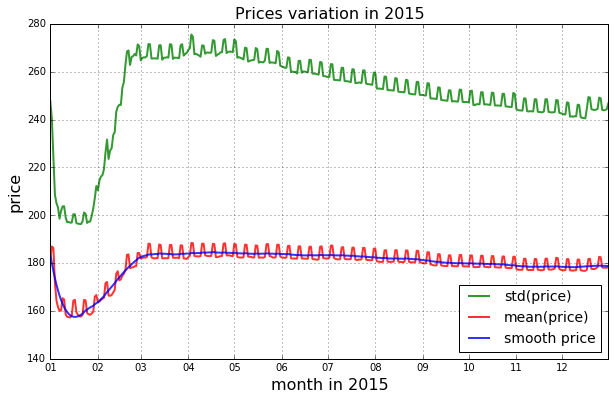

In [6]:
# Set date format
# years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator() # every day
monthsFmt = mdates.DateFormatter('%m')

# Plot price variation according to date
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 6))
col_mean=np.nanmean(calendar_np[:,:],axis=0)
col_mean_smooth=savgol_filter(col_mean,41,3)
col_std=np.nanstd(calendar_np[:,:],axis=0)
ax2.plot(datetime_all,col_std, c='green', label='std(price)', linewidth=2.0, alpha = 0.8)
ax2.plot(datetime_all,col_mean, c='red', label='mean(price)', linewidth=2.0, alpha = 0.8)
ax2.plot(datetime_all,col_mean_smooth, c='blue', label='smooth price', linewidth=2.0, alpha = 0.8)
ax2.set_xlabel('month in 2015', fontsize=16)
ax2.set_ylabel('price', fontsize=16)
ax2.set_title('Prices variation in 2015', fontsize=16)
# format the ticks
ax2.xaxis.set_major_locator(months)
ax2.xaxis.set_major_formatter(monthsFmt)
# ax2.xaxis.set_minor_locator(days)

#ax2.set_xlim([1,365])
plt.legend(loc = 4, fontsize = 14)
plt.grid()
plt.show()

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1147: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


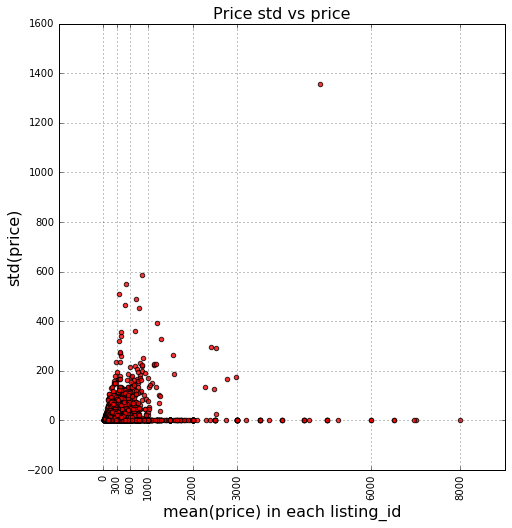

In [7]:
# Plot price standard deviation versus price
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 8))
row_mean=np.nanmean(calendar_np[:,:],axis=1)
row_std=np.nanstd(calendar_np[:,:],axis=1)
ax1.scatter(row_mean, row_std, c='red', alpha = 0.8)
ax1.set_xlabel('mean(price) in each listing_id', fontsize=16)
ax1.set_ylabel('std(price)', fontsize=16)
ax1.set_title('Price std vs price', fontsize=16)
plt.xticks([0, 300, 600, 1000, 2000, 3000, 6000, 8000], rotation='vertical')
plt.grid()
plt.show()

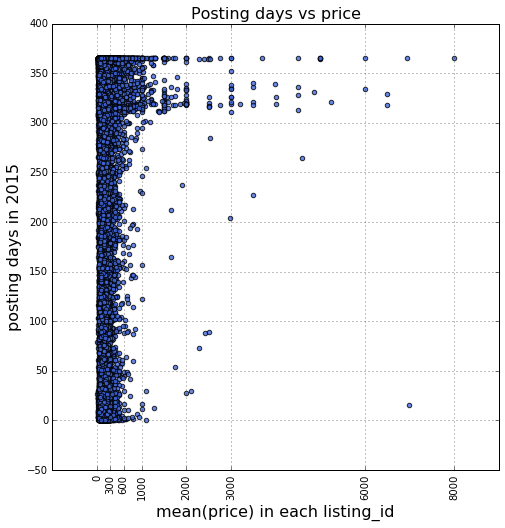

In [8]:
# Plot price standard deviation versus price
fig3, ax3 = plt.subplots(1, 1, figsize=(8, 8))
row_mean=np.nanmean(calendar_np[:,:],axis=1)
row_std=np.nanstd(calendar_np[:,:],axis=1)
row_nnan_cnt = 365 - row_nan_cnt
ax3.scatter(row_mean, row_nnan_cnt, c='RoyalBlue', alpha = 0.8)
ax3.set_xlabel('mean(price) in each listing_id', fontsize=16)
ax3.set_ylabel('posting days in 2015', fontsize=16)
ax3.set_title('Posting days vs price', fontsize=16)
plt.xticks([0, 300, 600, 1000, 2000, 3000, 6000, 8000], rotation='vertical')
plt.grid()
plt.show()

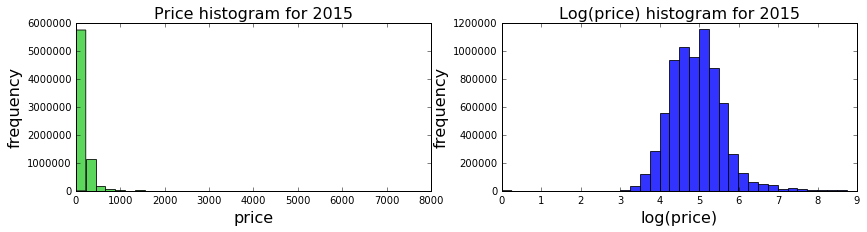

In [9]:
# Plot price histogram for all days
fig4, ax4 = plt.subplots(1, 2, figsize=(14, 3))
price_valid = calendar_np
price_valid = np.ndarray.flatten(price_valid)
price_valid = price_valid[~np.isnan(price_valid)] # remove NaN entries
price_valid = price_valid[price_valid!=0] # remove 10 entries with 0

ax4[0].hist(price_valid, bins=36, color='limegreen', alpha=0.8)
ax4[0].set_xlabel('price', fontsize=16)
ax4[0].set_ylabel('frequency', fontsize=16)
ax4[0].set_title('Price histogram for 2015', fontsize=16)

ax4[1].hist(np.log(price_valid), bins=36, color='Blue', alpha=0.8)
ax4[1].set_xlabel('log(price)', fontsize=16)
ax4[1].set_ylabel('frequency', fontsize=16)
ax4[1].set_title('Log(price) histogram for 2015', fontsize=16)

Total local price surge day: 109
['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
(2, 1, 0, 0, 0, 52, 52)


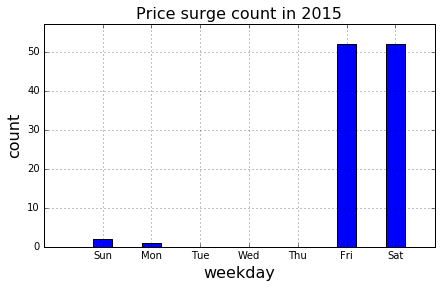

In [99]:
# Find local price surge days
days_local_surge=[]
for idx in range(365):
    if col_mean[idx] > col_mean_smooth[idx]:
        days_local_surge.append(datetime_all[idx].strftime("%a"))

# Plot histogram of local price surge days
c = Counter(days_local_surge)
Sun = c['Sun']
Mon = c['Mon']
Tue = c['Tue']
Wed = c['Wed']
Thu = c['Thu']
Fri = c['Fri']
Sat = c['Sat']

fig5, ax5 = plt.subplots(1, 1, figsize=(7, 4))
bar_heights = (Sun, Mon, Tue, Wed, Thu, Fri, Sat)
x = (1, 2, 3, 4, 5, 6, 7)
width = 0.4
ax5.bar(x, bar_heights, width)

ax5.set_xlim((0, 8))
ax5.set_ylim((0, max(bar_heights)*1.1))

ax5.set_xticks([i+width/2 for i in x])
ax5.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

ax5.set_xlabel('weekday', fontsize=16)
ax5.set_ylabel('count', fontsize=16)
ax5.set_title('Price surge count in 2015', fontsize=16)

print 'Total local price surge day: ' + str(len(days_local_surge))
print ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
print bar_heights

plt.grid()
plt.show()


Average weekday price:
['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
[ 178.26829084  177.98031636  177.91604803  177.95844604  178.2143705
  183.32812767  183.33841359]
Saturday/Tuesday ratio: 1.03047710206


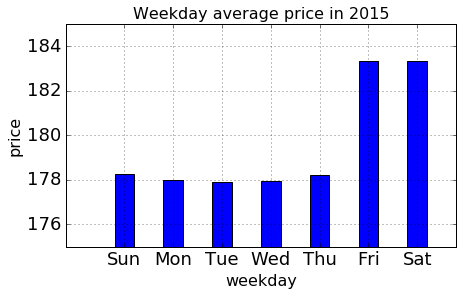

In [198]:
# Find local price surge days
weekday_all=[]
for idx in range(365):
        weekday_all.append(datetime_all[idx].strftime("%a"))
# print weekday_all[:10]
# Get mean price of each weekday
weekday_price=np.zeros([7])
weekday_price[0]=np.mean(col_mean[range(3,356,7)])
weekday_price[1]=np.mean(col_mean[range(4,356,7)])
weekday_price[2]=np.mean(col_mean[range(5,356,7)])
weekday_price[3]=np.mean(col_mean[range(6,356,7)])
weekday_price[4]=np.mean(col_mean[range(0,356,7)])
weekday_price[5]=np.mean(col_mean[range(1,356,7)])
weekday_price[6]=np.mean(col_mean[range(2,356,7)])
print 'Average weekday price:'
print ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
print weekday_price
print 'Saturday/Tuesday ratio: ' + str(weekday_price[6]/weekday_price[2])

# Plot weekday average price in 2015
fig7, ax7 = plt.subplots(1, 1, figsize=(7, 4))

x = (1, 2, 3, 4, 5, 6, 7)
width = 0.4
ax7.bar(x, weekday_price, width)

ax7.set_xlim((0, 8))
ax7.set_ylim((175, 185))

ax7.set_xticks([i+width/2 for i in x])
ax7.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

ax7.set_xlabel('weekday', fontsize=16)
ax7.set_ylabel('price', fontsize=16)
ax7.set_title('Weekday average price in 2015', fontsize=16)

plt.grid()
plt.show()


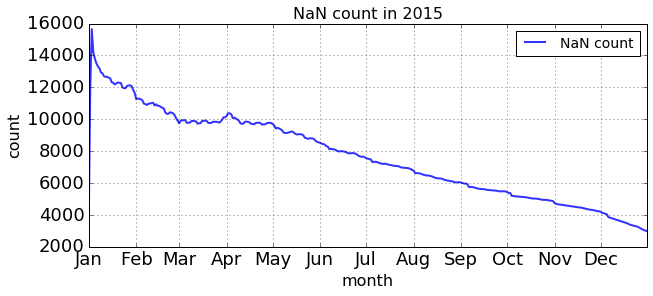

In [209]:
# Count NaN in 365 days
nan_cnt = np.zeros(365)
for d_idx in range(365):
    nan_cnt[d_idx] = np.sum(np.isnan(calendar_np[:,d_idx]))
fig10, ax10 = plt.subplots(1, 1, figsize=(10, 4))
ax10.plot(datetime_all,nan_cnt, c='blue', label='NaN count', linewidth=2.0, alpha = 0.8)
ax10.set_xlabel('month', fontsize=16)
ax10.set_ylabel('count', fontsize=16)
ax10.set_title('NaN count in 2015', fontsize=16)
# format the ticks
ax10.xaxis.set_major_locator(months)
ax10.xaxis.set_major_formatter(monthsFmt)
ax10.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                     'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc = 1, fontsize = 14)
plt.grid()
plt.show()

Max/min ratio: 1.17206894268


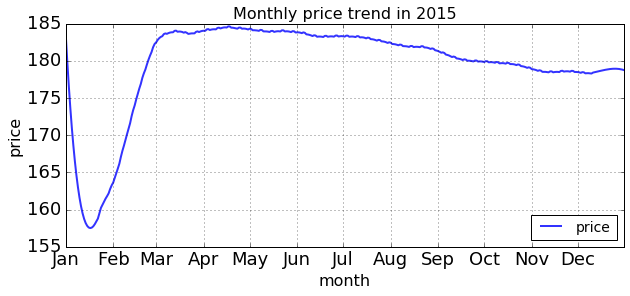

In [199]:
# Plot global trend of price
print 'Max/min ratio: ' + str(np.max(col_mean_smooth)/np.min(col_mean_smooth))
fig6, ax6 = plt.subplots(1, 1, figsize=(10, 4))
ax6.plot(datetime_all,col_mean_smooth, c='blue', label='price', linewidth=2.0, alpha = 0.8)
ax6.set_xlabel('month', fontsize=16)
ax6.set_ylabel('price', fontsize=16)
ax6.set_title('Monthly price trend in 2015', fontsize=16)
# format the ticks
ax6.xaxis.set_major_locator(months)
ax6.xaxis.set_major_formatter(monthsFmt)
ax6.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                     'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc = 4, fontsize = 14)
plt.grid()
plt.show()

## Price surge analysis based on location ###
- Analyze whether monthly price trend is related to location
- Analyze whether weekday price trend is related to location


In [13]:
# Load listing data
listing = pd.read_csv('../../Data/listings_clean.csv')
print(listing.columns.values)
listing.head()

['id' 'host_since' 'zipcode' 'latitude' 'longitude' 'property_type'
 'room_type' 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'bed_type'
 'guests_included' 'minimum_nights' 'maximum_nights' 'availability_30'
 'availability_60' 'availability_90' 'availability_365' 'number_of_reviews'
 'first_review' 'last_review' 'review_scores_rating'
 'review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_location' 'review_scores_value' 'host_listing_count'
 'price']


,id,host_since,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,price
0,1069266,1926,10022.0,40.756852,-73.964754,0,0,2,1.0,1.0,...,2542.0,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1,160
1,1846722,1625,NaN,40.830599,-73.941014,0,0,10,1.0,3.0,...,2554.0,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2,105
2,2061725,1831,11221.0,40.692189,-73.924120,0,1,2,1.0,1.0,...,2554.0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4,58
3,44974,953,10011.0,40.734751,-74.002592,0,0,2,1.0,1.0,...,2494.0,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1,185
4,4701675,2479,10011.0,40.745282,-73.997836,0,0,2,1.0,1.0,...,2533.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,195


In [51]:
# Get latitute, longitude for calendar
latitude_mat = np.zeros(calendar.shape[0])
longitude_mat = np.zeros(calendar.shape[0])

for idx in range(listing.shape[0]):
    match_idx = calendar[calendar['listing_id']==listing.iloc[idx]['id']].index.tolist()
    # Get latitude, longitude from listing
    latitude_mat[match_idx] = listing.iloc[idx]['latitude']
    longitude_mat[match_idx] = listing.iloc[idx]['longitude']


In [52]:
# Add latitude and longitude to calendar
calendar['latitude'] = pd.Series(latitude_mat, index=calendar.index)
calendar['longitude'] = pd.Series(longitude_mat, index=calendar.index)
calendar.head()

,listing_id,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,...,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31,latitude,longitude
0,3604481,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,...,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,40.768780,-73.988995
1,2949128,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,40.763752,-73.990212
2,4325397,100.0,100.0,100.0,100.0,100.0,70.0,70.0,70.0,80.0,...,70.0,80.0,80.0,70.0,70.0,70.0,70.0,70.0,40.757691,-73.934217
3,4325398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,275.0,275.0,275.0,275.0,275.0,275.0,275.0,275.0,40.697707,-73.930826
4,3426149,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,NaN,...,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,40.687700,-73.970779


## Map price to location ##


In [102]:
# Check weekday price change in NYC
Sun_idx = [index for index, value in enumerate(weekday_all) if value=='Sun']
Mon_idx = [index for index, value in enumerate(weekday_all) if value=='Mon']
Tue_idx = [index for index, value in enumerate(weekday_all) if value=='Tue']
Wed_idx = [index for index, value in enumerate(weekday_all) if value=='Wed']
Thu_idx = [index for index, value in enumerate(weekday_all) if value=='Thu']
Fri_idx = [index for index, value in enumerate(weekday_all) if value=='Fri']
Sat_idx = [index for index, value in enumerate(weekday_all) if value=='Sat']

Sun_mat = np.nanmean(calendar_np[:,Sun_idx+1],axis=1)
Mon_mat = np.nanmean(calendar_np[:,Mon_idx+1],axis=1)
Tue_mat = np.nanmean(calendar_np[:,Tue_idx],axis=1)
Wed_mat = np.nanmean(calendar_np[:,Wed_idx],axis=1)
Thu_mat = np.nanmean(calendar_np[:,Thu_idx],axis=1)
Fri_mat = np.nanmean(calendar_np[:,Fri_idx],axis=1)
Sat_mat = np.nanmean(calendar_np[:,Sat_idx],axis=1)

# Add weekday price to calendar
calendar['Sun'] = pd.Series(Sun_mat, index=calendar.index)
calendar['Mon'] = pd.Series(Mon_mat, index=calendar.index)
calendar['Tue'] = pd.Series(Tue_mat, index=calendar.index)
calendar['Wed'] = pd.Series(Wed_mat, index=calendar.index)
calendar['Thu'] = pd.Series(Thu_mat, index=calendar.index)
calendar['Fri'] = pd.Series(Fri_mat, index=calendar.index)
calendar['Sat'] = pd.Series(Sat_mat, index=calendar.index)
calendar.head()

,listing_id,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,...,12-31,latitude,longitude,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,3604481,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,...,600.0,40.768780,-73.988995,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
1,2949128,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,100.0,...,100.0,40.763752,-73.990212,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2,4325397,100.0,100.0,100.0,100.0,100.0,70.0,70.0,70.0,80.0,...,70.0,40.757691,-73.934217,70.576923,70.576923,70.000000,70.000000,70.566038,80.384615,80.384615
3,4325398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,275.0,40.697707,-73.930826,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
4,3426149,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,NaN,...,95.0,40.687700,-73.970779,110.581395,110.697674,109.756098,110.138889,111.184211,112.361111,111.944444


In [155]:
print np.max(log_price)
print np.min(log_price)

8.98719682066
2.30258509299


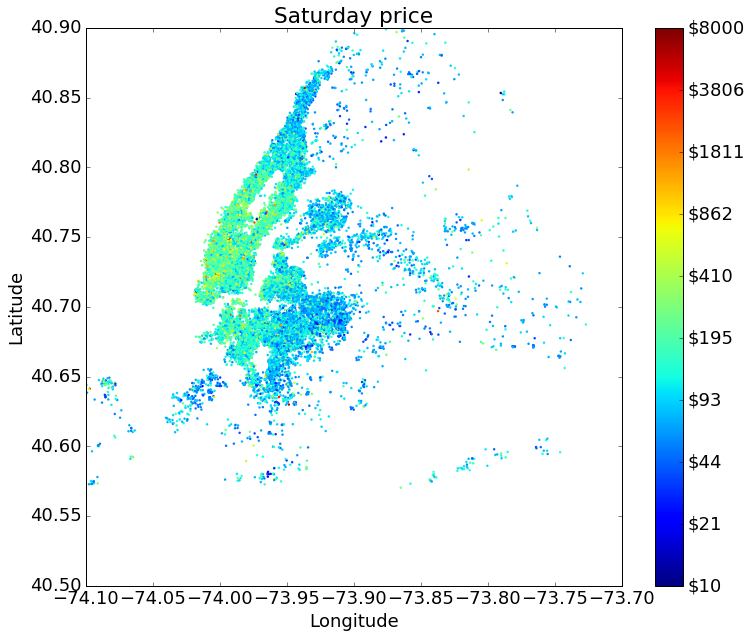

In [179]:
matplotlib.rcParams.update({'font.size': 18})
log_price=np.log(calendar["Sat"])
plt.figure(figsize=(12, 10))
plt.scatter(calendar["longitude"], calendar["latitude"], c=log_price, s=6, edgecolors='none')
plt.title("Saturday price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim((-74.1, -73.7))
plt.ylim((40.5, 40.9))
log_price_range = np.linspace(np.min(log_price), np.max(log_price), 10)
cbar = plt.colorbar(ticks=log_price_range)
price_range = np.round(np.exp(log_price_range)).astype(np.int)
cbar.ax.set_yticklabels(["$" + str(p) for p in price_range]);

In [193]:
float(185)/160

1.15625

(0.8, 1.4)

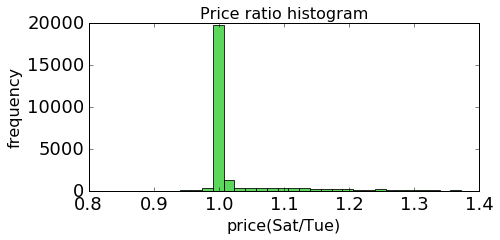

In [190]:
# Calculate price ratio (Sat/Tue), remove NaN in ratio
price_ratio=calendar["Sat"]/calendar["Tue"]
latitude_mat=calendar["latitude"]
latitude_mat=latitude_mat[~np.isnan(price_ratio)]
longitude_mat=calendar["longitude"]
longitude_mat=longitude_mat[~np.isnan(price_ratio)]
price_ratio=price_ratio[~np.isnan(price_ratio)]

# Plot histogram of price_ratio
fig8, ax8 = plt.subplots(1, 1, figsize=(7, 3))
ax8.hist(price_ratio, bins=512, color='limegreen', alpha=0.8)
ax8.set_xlabel('price(Sat/Tue)', fontsize=16)
ax8.set_ylabel('frequency', fontsize=16)
ax8.set_title('Price ratio histogram', fontsize=16)
ax8.set_xlim((0.8, 1.4))

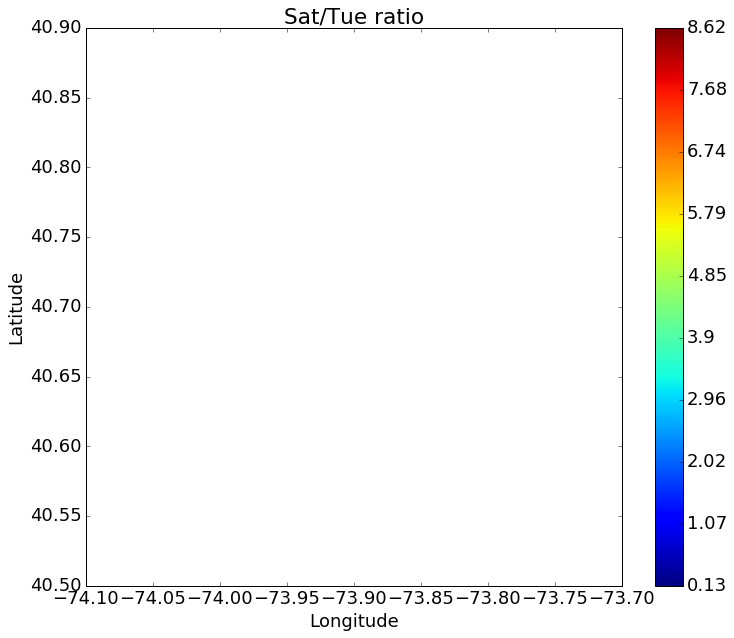

In [186]:
matplotlib.rcParams.update({'font.size': 18})
log_price= price_ratio

plt.figure(figsize=(12, 10))
plt.scatter(latitude_mat, longitude_mat, c = log_price, s=6, edgecolors='none')
plt.title("Sat/Tue ratio")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim((-74.1, -73.7))
plt.ylim((40.5, 40.9))
log_price_range = np.linspace(np.min(log_price), np.max(log_price), 10)
# log_price_range = np.linespace(0.8, 2, 10)
cbar = plt.colorbar(ticks=log_price_range)
# price_range=log_price_range
price_range = np.round(log_price_range, decimals=2)
cbar.ax.set_yticklabels([str(p) for p in price_range]);
plt.show()

NameError: name 'latidue_mat' is not defined

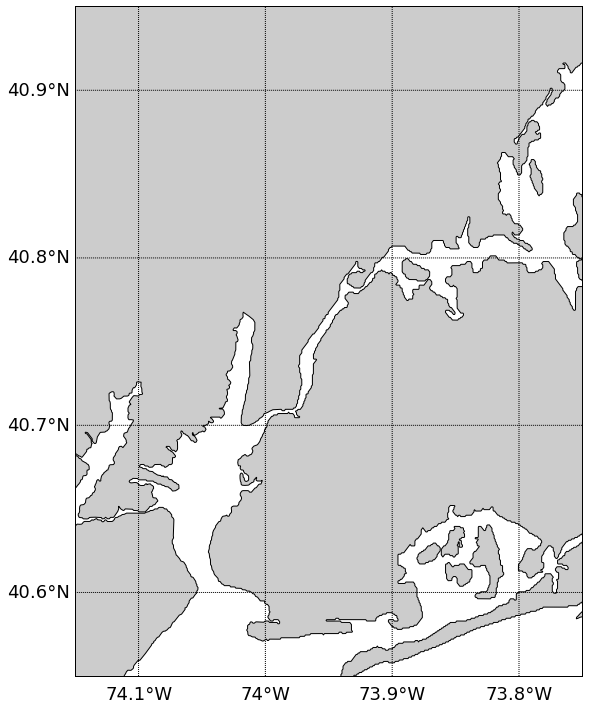

In [180]:
# Plot spatial price_ratio Sat/Tue distribution
plt.figure(figsize=(10, 12))
# setup mercator map projection
# run with low resolution 'l' to debug faster 
m = Basemap(llcrnrlon=-74.15,llcrnrlat=40.55,
            urcrnrlon=-73.75,urcrnrlat=40.95,
            resolution='f',projection='merc')

# draw map
m.drawcoastlines()
m.fillcontinents(zorder=0)
# m.drawcountries()
# m.fillcontinents(color = 'gainsboro')
# m.drawmapboundary(fill_color='steelblue')

# draw parallels and meridians
m.drawparallels(np.arange(40, 41, 0.1), labels=[1, 0, 0, 1])
m.drawmeridians(np.arange(-74.5, -73.5, 0.1), labels=[1, 0, 0, 1])

# draw locations
x, y = m(calendar["longitude"].as_matrix(), calendar["latitude"].as_matrix())
x, y = m(longitude_mat, latitude_mat)
m.scatter(x, y, c=price_ratio, s=6, edgecolors='none')

# title and colorbar
plt.title("Price(Sat/Tue)")
# price_gap_range = np.linspace(np.min(price_ratio), np.max(price_ratio), 10)
price_ratio_range = np.linspace(0.8, 1.5, 10)
cbar = plt.colorbar(ticks=price_ratio_range, fraction=0.03, pad=0.03)
ratio_range = np.round(price_ratio_range, decimals=2)
cbar.ax.set_yticklabels(["$" + str(p) for p in ratio_range]);

In [117]:
import gmplot
# gmap = gmplot.from_geocode("San Francisco")
gmap = gmplot.GoogleMapPlotter(-73.95, 40.75, 16)
xx=calendar["longitude"]
yy=calendar["latitude"]
gmap.scatter(xx, yy, c=log_price, s=6, edgecolors='none')
# calendar["longitude"], calendar["latitude"], c=log_price, s=6, edgecolors='none'
gmap.draw("test.html")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().